
<h1>Trabalho Prático - Redes Neurais</H1>

Nome: Marco Aurélio Soares Abrantes \\
Matrícula: es98887

O Código a seguir realiza o download de um conjunto de dados de imagens que podem ser enquadradas em 10 classes distintas. Foi implementada uma rede convolucional, mas no entanto ela possui uma precisão por volta de **50%**. Seu trabalho é aumentar  precisão da rede para que ela fique pelo menos em **90%.**


170508288/170498071 [==============================] - 2s 0us/step


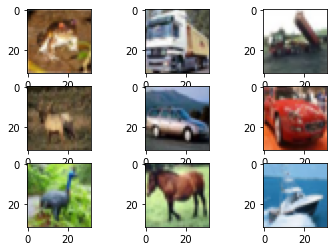

In [ ]:
# Plot ad hoc CIFAR10 instances
import numpy as np

from keras.datasets import cifar10
from matplotlib import pyplot
from PIL import Image
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images

for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i])
# show the plot
pyplot.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 16, 16)       0         
 )                                                               
                                                        

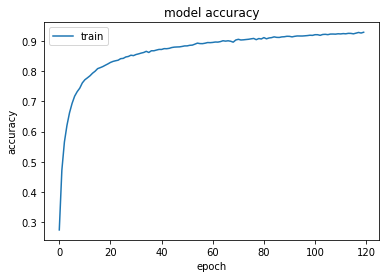

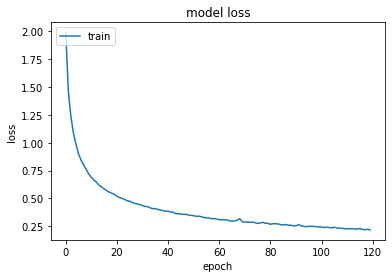

INFO:tensorflow:Assets written to: modelT1/assets

Fim


In [ ]:
from time import time
import matplotlib.pyplot as plt
import numpy
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.losses import categorical_crossentropy

from keras import backend as K
K.set_image_data_format('channels_first')


# Fixando a aleatoriedade
seed = 7
numpy.random.seed(seed)

# Carregando os dados
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#print("Xtrain[0] ",X_train[0])
#print("Ytrain[0] ",y_train[0])


# Normalizando as entradas para 0-255 to 0.0-1.0

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# Codificando a saida para one hot
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

#print("Xtrain[0] ",X_train[0])
#print("Ytrain[0] ",y_train[0])


# Criando o modelo
'''
Rede Neural CNN
Aumentando a quantidade de camadas é mais provável que ocorra um overfitting,
fazendo com que a necessidade de uma normalização se torne mais crítica
'''
model = Sequential()
# Convolução com função de ativação relu
model.add(Conv2D(filters=32, kernel_size= (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu'))
# A normalização em lote é aplicada a camadas individuais
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size= (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# cada unidade na camada de pooling pode resumir uma região de 2 × 2 neurônios na camada anterior
model.add(MaxPooling2D((2, 2)))
'''
Tira 1/4 dos neurônios na hora do treinamento para ficar menos sensíveis aos pesos
Para uma generalização maior e uma menor probabilidade de overfitting
'''
model.add(Dropout (0.25))

'''
Aumentando camadas da rede neural para cada etapa identificar os padrões da imagem
aumentando o número de filtros também
'''
model.add(Conv2D(filters=64, kernel_size= (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size= (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout (0.5))

model.add(Conv2D(filters=128, kernel_size= (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size= (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout (0.5))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout (0.5))
# função que vai gerar uma distribuição de probabilidades
model.add(Dense(num_classes, activation='softmax')) 

# Compilando o modelo
epocas = 120
# Valor padrão da taxa de aprendizagem para Adam
lrate = 0.001
'''
Apesar do SGD ser eficiente para problemas de classificação de imagem,
nesse caso o Adam funcionou melhor
Adam é computacionalmente eficiente, tem pouca necessidade de memória,
invariante ao reescalonamento diagonal de gradientes
'''
adam = Adam(learning_rate=lrate)
model.compile(loss=categorical_crossentropy, optimizer=adam, metrics=['accuracy' ]) 
print(model.summary())

# Treinando o modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epocas, batch_size=64)

# Avaliacao final do modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Sumariza para a precisão
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Sumariza para a mostrar a perda
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save('modelT1')

print("\nFim")